In [1]:
from commonfunctions import *
import numpy as np
import cv2
import math
import timeit
import multiprocessing
%matplotlib inline
%load_ext autoreload
%autoreload 2

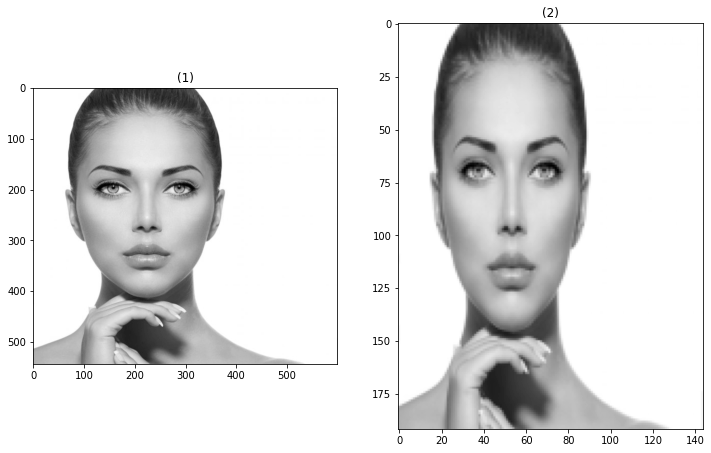

In [2]:
img = rgb2gray(io.imread('test_images\woman.jpg'))

resized = cv2.resize(img, (144,192), interpolation = cv2.INTER_AREA)
show_images([img,resized])

In [3]:
def HOG_descriptor(img):
    resized = cv2.resize(img, (48,64), interpolation = cv2.INTER_AREA)
    mag,angle=gradient(resized)
#     print(resized.shape)
    
    #loop on mag and angle to get 16*16 cell
    windowsize_r =16
    windowsize_c =16
    bin_size=20
    mag_cells=[]
    ang_cells=[]

    
    #check code image on what`s app for efficient split
    
    #TODO make 2d
    
#     for r in range(0,mag.shape[0] - windowsize_r, windowsize_r):
#         temp_mag=[]
#         temp_angle=[]
#         for c in range(0,mag.shape[1] - windowsize_c, windowsize_c):  
            
#             temp_mag.append(mag[r:r+windowsize_r,c:c+windowsize_c])
#             temp_angle.append(angle[r:r+windowsize_r,c:c+windowsize_c])
        
#         mag_cells.append(temp_mag)
#         ang_cells.append(temp_angle)  

    #get 16*16 cells
    mag_cells=cut_image(mag,windowsize_r,windowsize_c)
    ang_cells=cut_image(angle,windowsize_r,windowsize_c)
    
#     print(mag_cells.shape)
#     show_images([mag_cells[1][0],mag_cells[1][1],mag_cells[1][2],mag_cells[1][3]])
    
    #histogram of each cell
    hist=np.zeros((mag_cells.shape[0], mag_cells.shape[1],180//bin_size))
    start = timeit.default_timer()
    #for r in range(mag_cells.shape[0]):
    #   for  c in range(mag_cells.shape[1]):
    #       hist[r][c]=HOG_histogram(mag_cells[r][c],ang_cells[r][c], bin_size)
    #processes=[[Process(target=HOG_histogram, args=(mag_cells[r][c],ang_cells[r][c], bin_size,)) for c in range(mag_cells.shape[1])]for r in range(mag_cells.shape[0])]
    stop = timeit.default_timer()
    print("timewewwww",stop-start)
    processes=[]
    #for r in range(mag_cells.shape[0]):
    #    x=[]
    #    for  c in range(mag_cells.shape[1]):
    #        x.append(Process(target=HOG_histogram, args=(mag_cells[r][c],ang_cells[r][c], bin_size,)))
    #        x[-1].start()
    #    processes.append(x)
    start = timeit.default_timer()
    print(mag_cells.shape[0]*mag_cells.shape[1])
    with multiprocessing.Pool(mag_cells.shape[0]*mag_cells.shape[0]) as pool:
        hist=[[pool.apply_async(HOG_histogram, (mag_cells[r][c],ang_cells[r][c], bin_size,)) for c in range(mag_cells.shape[1])]for r in range(mag_cells.shape[0])]
        for r in hist:
            for c in r:
                print(c.get())
    #    for  c in range(mag_cells.shape[1]):
    
    #print('Ordered results using pool.apply_async():')
    #for r in results:
    #    print('\t', r.get())
    #print()

    #print('Ordered results using pool.imap():')
    #for x in imap_it:
    #    print('\t', x)

    
    #norm_hist=[]
    #start = timeit.default_timer()
    #for r in range(hist.shape[0]-1):
    #    for  c in range(hist.shape[1]-1):
    #        processes[r][c].join()
    #        processes[r+1][c].join()
    #        processes[r][c+1].join()
    #        processes[r+1][c+1].join()
    #        stop = timeit.default_timer()
    #        print("timewezzzzzzzzzzz",stop-start)
    #        temp=hist[r:r+2, c:c+2].reshape(-1)
    #        temp/=np.linalg.norm(temp)
    #        norm_hist+=list(temp)
    #stop = timeit.default_timer()
    #print("timewelllllllll",stop-start)
    #norm_hist=np.asarray(norm_hist)
    #return norm_hist
#     print('size of hist',hist.shape)
#     print('size of norm_hist',norm_hist.shape)
   
    
 
    

In [4]:
def cut_image(img,windowsize_r,windowsize_c):
    tiles=[]
    img_r=img.shape[0]
    img_c=img.shape[1]
    tiles=img.reshape(img_r//windowsize_r,
                      windowsize_r,
                     img_c//windowsize_c,
                     windowsize_c)
    tiles=tiles.swapaxes(1,2)
    return tiles

In [5]:
def HOG_histogram(mag,angle,bin_size=20):
    print("da5aaaal")
    hist=np.zeros(int(180/bin_size))
    low_bins=20*(angle//20)
    
    high_bins=20+low_bins
    
    ## weights
    weight_low_bin=(abs(high_bins-angle)/20)*mag
    weight_high_bin=(abs(angle-low_bins)/20)*mag
    
    
    high_bins=high_bins%180
    for i in range(hist.shape[0]):
        
        votes_low=np.sum(weight_low_bin[(low_bins//20)==i])
        votes_high=np.sum(weight_high_bin[(high_bins//20)==i])
        hist[i]=votes_low+votes_high
    
    return hist   
    #print(np.sum(mag))
    #print(np.sum(hist))
    #print(weight_low_bin.sum()+weight_high_bin.sum(),mag.sum())

    
    
    

In [6]:
#cell is a matrix 8x8
def gradient(img):
    img=np.float32(img) / 255.0
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

#     show_images([gx,gy,mag,angle],["gx","gy","mag","angle"])
#     print("mag",np.sum(mag))
    return mag,angle%180

    
    

In [ ]:
start1 = timeit.default_timer()
print(HOG_descriptor(cv2.resize(img, (64,48), interpolation = cv2.INTER_AREA)))
stop1 = timeit.default_timer()
print(stop1-start1)

timewewwww 2.9999999995311555e-07
12


In [55]:
from sklearn.datasets import fetch_lfw_people
from skimage import data, color, feature,transform
from  sklearn.feature_extraction.image import PatchExtractor

faces = fetch_lfw_people()

In [9]:
# SVM

#positive data
positive_patches = faces.images
print(positive_patches.shape)


imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())
          for name in imgs_to_use]


(13233, 62, 47)


<ipython-input-9-00e0f3567f46>:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  images = [color.rgb2gray(getattr(data, name)())


In [12]:
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 62, 47)

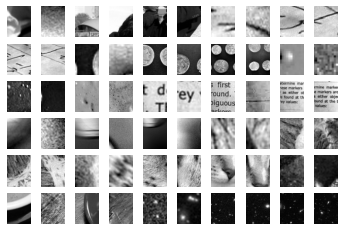

In [13]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [16]:
from itertools import chain
X_train = np.array([HOG_descriptor(im)
                    for im in chain(positive_patches, negative_patches)])

# add labels
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [17]:
print(X_train)

None


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), X_train, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
print('svm',grid.best_score_)